# <font color='green'>Sample</font>

### <font color='green'>Header</font>

In [1]:
import sys
!{sys.executable} -m pip install scikit-learn

In [2]:
from astropy.io import fits
from matplotlib import colors
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Read COSMOS catalog
hd = fits.open("COSMOS2020_CLASSIC_R1_v2.1_p3.fits")
hd[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3491 / length of dimension 1                          
NAXIS2  =              1720700 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  754 / number of table fields                         
EXTNAME = 'PHASE3CATALOG'                                                       
TTYPE1  = 'ID      '                                                            
TCOMM1  = 'ID (specifically ID_CLASSIC, as this is the Classic catalogue)'      
TUCD1   = 'meta.id;meta.main'                                                   
TFORM1  = 'K       '        

### <font color='green'>Define Cells</font>

In [3]:
Mothercell = (hd[1].data['FLAG_COMBINED'] == 0) & (hd[1].data['lp_type'] == 0) & (hd[1].data['UVISTA_Ks_MAG_AUTO'] < 22.4) & (hd[1].data['ez_z_phot'] < 3.0)

In [4]:
Cell1 = Mothercell & (hd[1].data['ez_z_phot'] > 0.0) & (hd[1].data['ez_z_phot'] < 0.5)

In [5]:
Cell2 = Mothercell & (hd[1].data['ez_z_phot'] > 0.5) & (hd[1].data['ez_z_phot'] < 1.0)

In [6]:
Cell3 = Mothercell & (hd[1].data['ez_z_phot'] > 1.0) & (hd[1].data['ez_z_phot'] < 1.5)

In [7]:
Cell4 = Mothercell & (hd[1].data['ez_z_phot'] > 1.5) & (hd[1].data['ez_z_phot'] < 2.0)

In [8]:
Cell5 = Mothercell & (hd[1].data['ez_z_phot'] > 2.0) & (hd[1].data['ez_z_phot'] < 2.5)

In [9]:
Cell6 = Mothercell & (hd[1].data['ez_z_phot'] > 2.5) & (hd[1].data['ez_z_phot'] < 3.0)

In [10]:
Motherlist = [Cell1, Cell2, Cell3, Cell4, Cell5, Cell6]

In [11]:
print ("Amount of objects: ")
print ("Before: ", len(hd[1].data['FLAG_COMBINED'] == 0))
print ("After: ", len(hd[1].data['FLAG_COMBINED'][Mothercell]))

Amount of objects: 
Before:  1720700
After:  70553


### <font color='green'>Define SF, Q according to sSFR </font>

In [12]:
sfLine = -10
qLine = -11

sf_sSFR_array = Mothercell & (hd[1].data['lp_sSFR_med'] > sfLine)
gv_sSFR_array = Mothercell & (hd[1].data['lp_sSFR_med'] < sfLine) & (hd[1].data['lp_sSFR_med'] > qLine)
q_sSFR_array = Mothercell & (hd[1].data['lp_sSFR_med'] < qLine)

In [13]:
sf_sSFR_array_separate = []
q_sSFR_array_separate = []
for i in range(0,6):
    currentCell = Motherlist[i]
    sf_sSFR_array_separate.append(currentCell & (hd[1].data['lp_sSFR_med'] > sfLine))
    q_sSFR_array_separate.append(currentCell & (hd[1].data['lp_sSFR_med'] < qLine))

In [14]:
sf_sSFR = (sf_sSFR_array.tolist()).count(True)
gv_sSFR = (gv_sSFR_array.tolist()).count(True)
q_sSFR  = ( q_sSFR_array.tolist()).count(True)

sf_sSFR_pct = ( sf_sSFR / (sf_sSFR + q_sSFR + gv_sSFR) )*100
gv_sSFR_pct = ( gv_sSFR / (sf_sSFR + q_sSFR + gv_sSFR) )*100
q_sSFR_pct = ( q_sSFR / (sf_sSFR + q_sSFR + gv_sSFR) )*100

print("sSFR Criteria:\n")
print("Star Forming: ", sf_sSFR, "("+str(sf_sSFR_pct)+"%)")
print("Green Valley: ", gv_sSFR, "("+str(gv_sSFR_pct)+"%)")
print("Quiescent: ", q_sSFR,"("+str(q_sSFR_pct)+"%)"+"\n")

sSFR Criteria:

Star Forming:  51677 (73.26329817398208%)
Green Valley:  7014 (9.94385845525689%)
Quiescent:  11845 (16.79284337076103%)



In [15]:
sf_sSFR_separate = []
q_sSFR_separate = []
sf_sSFR_separate_pct = []
q_sSFR_separate_pct = []

print("sSFR Criteria:\n")
for i in range(0,6):
    zmin = i*0.5
    zmax = zmin + 0.5
    
    sf_sSFR_separate.append((sf_sSFR_array_separate[i].tolist()).count(True))
    q_sSFR_separate.append(( q_sSFR_array_separate[i].tolist()).count(True))
    
    sf_sSFR_separate_pct.append(( sf_sSFR_separate[i] / (sf_sSFR_separate[i] + q_sSFR_separate[i]) )*100)
    q_sSFR_separate_pct.append (( q_sSFR_separate[i]  / (sf_sSFR_separate[i] + q_sSFR_separate[i]) )*100)
        
    print("(",str(zmin)+" < z < "+str(zmax),")")
    print("Star Forming: ", sf_sSFR_separate[i], "("+str(sf_sSFR_separate_pct[i])+"%)")
    print("Quiescent: ", q_sSFR_separate[i], "("+str(q_sSFR_separate_pct[i])+"%)"+"\n")
    

sSFR Criteria:

( 0.0 < z < 0.5 )
Star Forming:  10263 (80.9512541410317%)
Quiescent:  2415 (19.048745858968292%)

( 0.5 < z < 1.0 )
Star Forming:  19491 (78.45986635536592%)
Quiescent:  5351 (21.54013364463409%)

( 1.0 < z < 1.5 )
Star Forming:  12869 (81.89512536591575%)
Quiescent:  2845 (18.104874634084254%)

( 1.5 < z < 2.0 )
Star Forming:  5656 (85.98358163575554%)
Quiescent:  922 (14.016418364244451%)

( 2.0 < z < 2.5 )
Star Forming:  2744 (92.42169080498485%)
Quiescent:  225 (7.578309195015157%)

( 2.5 < z < 3.0 )
Star Forming:  654 (88.25910931174089%)
Quiescent:  87 (11.740890688259109%)



## Useful Functions

### Confusion Matrix

In [16]:
def confusion_matrix(crit1, crit2):

    q1 = 0 # 1st quadrant
    q2 = 0 # 2nd quadrant
    q3 = 0 # 3rd quadrant
    q4 = 0 # 4th quadrant

    for i in range(len(crit1)):
        if crit1[i] == True and crit2[i] == True:
            q1 += 1
        elif crit1[i] == False and crit2[i] == True:
            q2 += 1
        elif crit1[i] == True and crit2[i] == False:
            q3 += 1
        elif crit1[i] == False and crit2[i] == False:
            q4 += 1

    q_sum = q1+q2+q3+q4
    q1_pct = (q1/q_sum)*100
    q2_pct = (q2/q_sum)*100
    q3_pct = (q3/q_sum)*100
    q4_pct = (q4/q_sum)*100

    print("Q1:", q1, "(", q1_pct, "%)")
    print("Q2:", q2, "(", q2_pct, "%)")
    print("Q3:", q3, "(", q3_pct, "%)")
    print("Q4:", q4, "(", q4_pct, "%)")

    cm1 = metrics.confusion_matrix(crit1, crit2, normalize="all", labels=[True,False])
    cm1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = ["SF","Q"])

    cm1_display.plot()
    plt.show()

### Scatter

In [97]:
def scatter(plot_type, A, B, C, colouring, zmin=0, zmax=3):
    
    # U V J
    if plot_type == 1:
        
        # Boundaries
        plt.xlim(-0.1, 2.4)
        plt.ylim(0, 2.6)
        
        # Williams' Line
        wa = 0.88
        wb = 0.49
        if i == 0: wb = 0.69
        elif i == 1: wb = 0.59
        wx = np.linspace(-5, 10, 1000)
        wy = wa*wx + wb # diagonal
        wy[wx < (1.3 - wb)/wa] = 1.3 # horizontal
        wx[wy > wa*1.6 + wb] = 1.6 # vertical

        # Giovanni Line
        ga = 0.88
        gb = 0.42
        gx = np.linspace(-5, 10, 1000)
        gy = ga*gx + gb # diagonal
        gy[gx < (1.3-gb)/ga] = 1.3 # horizontal
        gx[gy > ga*1.6 + gb] = 1.6 # vertical
        
        # Draw stuff
        plt.plot(wx, wy, color = 'red', label = "UVJ-1") # plot Williams line
        plt.plot(gx, gy, color = 'black', linestyle = '--', label = "UVJ-2") # plot Giovanni line
    
    # NUV r J
    elif plot_type == 2:
        
        # Boundaries
        plt.xlim(-0.1, 2.4)
        plt.ylim(0, 5.8)
        
        # Ilbert line
        ix = np.linspace(-5, 10, 1000)
        iy = 3*ix + 1 # diagonal
        iy[ix < 0.7] = 3.1
        
        # Draw Stuff
        plt.plot(ix, iy, color = 'brown', label = "NUVrJ") # plot Ilbert line

    plt.scatter(np.asarray(B) - np.asarray(C), np.asarray(A) - np.asarray(B), c = colouring, vmin=-7, vmax=-12, marker='o', s = 0.05, cmap='jet_r')
    
    # Text box
    xtext = 0
    ytext = 0
    if zmin==0 and zmax==3:
        if plot_type == 1:
            plt.xlabel("V - J")
            plt.ylabel("U - V")
            plt.title("0<z<3")
            xtext, ytext = 1.50, 0.14
        elif plot_type == 2:
            plt.xlabel("r - J")
            plt.ylabel("NUV - r")
            plt.title("0<z<3")
            xtext, ytext = 1.58, 0.35
    else:
        if plot_type == 1:
            xtext, ytext = 1.35, 0.14
        elif plot_type == 2:
            xtext, ytext = 1.41, 0.30
            if zmin==0.5: ytext=0.80
        plt.text(xtext, ytext, str(zmin)+" < z < "+str(zmax), fontsize = 12, bbox={'facecolor': 'navy', 'alpha': 0.5, 'pad': 10})
    
        
    plt.legend()
    
    # Colorbar
    plt.subplots_adjust(bottom = 0.1, right = 0.94, top = 0.9, # make room for the colorbar
                        wspace = 0  , hspace = 0) 
    if zmin==0 and zmax==3:
        plt.colorbar( aspect=30,label = r'$\log_{10} (sSFR) [yr^{-1}]$' ) 
    else:
        plt.colorbar( cax = plt.axes([0.98, 0.1, 0.075, 0.8]), label = r'$\log_{10} (sSFR) [yr^{-1}]$' )

### sSFR Analysis

In [18]:
def ssfr_analysis(plot_type, cell, A, B, C, cell_number, zmin, zmax, include_gv = False):
      
    x = np.array(B) - np.array(C)
    y = np.array(A) - np.array(B)
    
    if include_gv == False:
        
        # According to sSFR
        sf_amount = 0
        q_amount = 0
        if zmin == 0 and zmax == 3:
            sf_amount = sf_sSFR
            q_amount = q_sSFR
        else:
            sf_amount = sf_sSFR_separate[cell_number-1]
            q_amount = q_sSFR_separate[cell_number-1]
        
        if plot_type == 1: # U V J
            
            tfArray_w = [] # array with True for SF and False for Q
            tfArray_g = []
            
            # According to Williams and Gz
            sf_w = 0
            sf_g = 0
            q_w = 0
            q_g = 0
            
            # Williams' Line
            wa = 0.88
            wb = 0.49
            if cell_number == 1: wb = 0.69
            elif cell_number == 2: wb = 0.59
            wx = np.linspace(-0.1, 2.5, 1000)
            wy = wa*wx + wb # diagonal
            wy[wx < (1.3 - wb)/wa] = 1.3 # horizontal
            wx[wy > wa*1.6 + wb] = 1.6 # vertical

            # Giovanni Line
            ga = 0.88
            gb = 0.42
            gx = np.linspace(-0.1, 2.5, 1000)
            gy = ga*gx + gb # diagonal
            gy[gx < (1.3-gb)/ga] = 1.3 # horizontal
            gx[gy > ga*1.6 + gb] = 1.6 # vertical
            
            for j in range(len(x)):
                
                # Williams
                isSF = True
                region1 = (x[j] > 0 and x[j] < (1.3-wb)/wa and y[j] > 1.3)
                region2 = (x[j] > (1.3-wb)/wa and x[j] < 1.6 and y[j] >wa*x[j] + wb)
                if region1 or region2: isSF = False

                if isSF: sf_w += 1
                else: q_w += 1
                
                tfArray_w.append(isSF)
                
                # Giovanni
                isSF = True
                region1 = (x[j] > 0 and x[j] < (1.3-gb)/ga and y[j] > 1.3)
                region2 = (x[j] > (1.3-gb)/ga and x[j] < 1.6 and y[j] >ga*x[j] + gb)
                if region1 or region2: isSF = False

                if isSF: sf_g += 1
                else: q_g += 1
                
                tfArray_g.append(isSF) # append galaxy true/false (SF/Q) value to array
                
            # Misclassified calculation
            sf_w_contaminants = sf_w - sf_amount
            sf_g_contaminants = sf_g - sf_amount
            q_w_contaminants = q_w - q_amount
            q_g_contaminants = q_g - q_amount
            pctSF_w_contaminants = (sf_w_contaminants/sf_w)*100
            pctSF_g_contaminants = (sf_g_contaminants/sf_g)*100
            pctQ_w_contaminants = (q_w_contaminants/q_w)*100
            pctQ_g_contaminants = (q_g_contaminants/q_g)*100

            total_w = sf_w + q_w
            pctSF_w = (sf_w/total_w)*100
            pctQ_w = 100 - pctSF_w

            total_g = sf_g + q_g
            pctSF_g = (sf_g/total_g)*100
            pctQ_g = 100 - pctSF_g

            print("(",zmin,"< z <",zmax,")")
            print("(WILLIAMS)")
            print('Star Forming Galaxies: ', sf_w, "("+str(pctSF_w)+"%). Misclassified: ", sf_w_contaminants,  "("+str(pctSF_w_contaminants)+"%).")
            print('Quiescent Galaxies: ', q_w, "("+str(pctQ_w)+"%). Misclassified: ", q_w_contaminants,  "("+str(pctQ_w_contaminants)+"%).\n")
            print("(GIOVANNI)")
            print('Star Forming Galaxies: ', sf_g, "("+str(pctSF_g)+"%). Misclassified: ", sf_g_contaminants,  "("+str(pctSF_g_contaminants)+"%).")
            print('Quiescent Galaxies: ', q_g, "("+str(pctQ_g)+"%). Misclassified: ", q_g_contaminants,  "("+str(pctQ_g_contaminants)+"%).\n")
            
            williamsDict = {"true/false":tfArray_w, "sf ratio":pctSF_w, "q ratio":pctQ_w}
            giovanniDict = {"true/false":tfArray_g, "sf ratio":pctSF_g, "q ratio":pctQ_g}
            
            return {"williams":williamsDict, "giovanni":giovanniDict}
        
        elif plot_type == 2: # NUV r J
            
            tfArray = [] # array with True for SF and False for Q
            
            # According to Ilbert
            sf_i = 0
            q_i = 0
            
            # Ilbert line
            ix = np.linspace(-5, 10, 1000)
            iy = 3*ix + 1 # diagonal
            iy[ix < 0.7] = 3.1 # horizontal
            
            for j in range(len(x)):
                
                # Ilbert
                isSF = True
                region1 = (x[j] < 0.7 and y[j] > 3.1)
                region2 = (x[j] > 0.7 and y[j] > 3*x[j] + 1)
                if region1 or region2: isSF = False
                
                if isSF: sf_i += 1
                else: q_i += 1
                
                tfArray.append(isSF) # append galaxy true/false (SF/Q) value to array
                
            # Misclassified calculation
            sf_i_contaminants = sf_i - sf_amount
            q_i_contaminants = q_i - q_amount
            pctSF_i_contaminants = (sf_i_contaminants/sf_i)*100
            pctQ_i_contaminants = (q_i_contaminants/q_i)*100

            total_i = sf_i + q_i
            pctSF_i = (sf_i/total_i)*100
            pctQ_i = 100 - pctSF_i

            print("(",zmin,"< z <",zmax,")")
            print("(ILBERT)")
            print('Star Forming Galaxies: ', sf_i, "("+str(pctSF_i)+"%). Misclassified: ", sf_i_contaminants,  "("+str(pctSF_i_contaminants)+"%).")
            print('Quiescent Galaxies: ', q_i, "("+str(pctQ_i)+"%). Misclassified: ", q_i_contaminants,  "("+str(pctQ_i_contaminants)+"%).\n")
                
            return {"true/false":tfArray, "nuvrj sf ratio":pctSF_i, "nuvrj q ratio":pctQ_i}
        
    else: # pure sSFR
        
        tfArray = [] # array with true for sf and false for q
        completeArray = [] # 0: sf, 1: gv, 2: q
        
        data = hd[1].data['lp_sSFR_med'][cell]
        median = np.nanmedian(data)
    
        sf = 0
        gv = 0
        q = 0
        for i in range(len(data)):
            if (data[i] > sfLine):
                sf += 1
                tfArray.append(True)
                completeArray.append(0)
            elif (data[i] > qLine and data[i] < sfLine):
                gv += 1
                completeArray.append(1)
            else:
                q += 1
                tfArray.append(False)
                completeArray.append(2)

        total = sf + q + gv
        pctSF = (sf/total)*100
        pctGV = (gv/total)*100
        pctQ  = (q /total)*100
        print("("+str(zmin)+" < z < "+str(zmax)+")")
        print('Star Forming Galaxies: ', sf, "("+str(pctSF)+"%)")
        print('Green Valley Galaxies: ', gv, "("+str(pctGV)+"%)")
        print('Quiescent Galaxies: ', q, "("+str(pctQ)+"%)")
    
        print("Median ("+str(zmin)+" < z < "+str(zmax)+") = "+str(median)+"\n")
       
        return {"data":data, "complete":completeArray, "true/false":tfArray, "ssfr sf ratio":(sf/(sf+q))*100, "ssfr q ratio":(q/(sf+q))*100}

## <font color='green'>Galaxy Map</font>
PUT IN SAMPLE SECTION

Plot map of the galaxies of interest, using the angles of declination and right ascension. The white spots are due to bright objects, such as stars, saturating the lens. Thus, such data is deleted and not used.

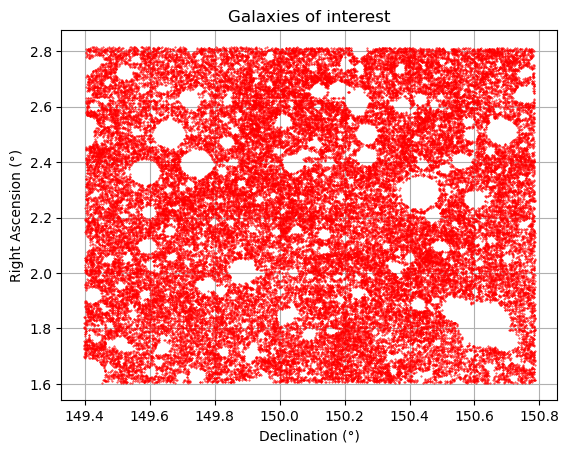

In [19]:
for Cell in Motherlist:
    plt.plot(hd[1].data['ALPHA_J2000'][Cell], hd[1].data['DELTA_J2000'][Cell], 'ro', markersize=0.4)
    plt.title("Galaxies of interest")
    plt.xlabel("Declination (°)")
    plt.ylabel("Right Ascension (°)")
    plt.grid(True)

plt.show()

## <font color='green'>Redshift Distribution</font>

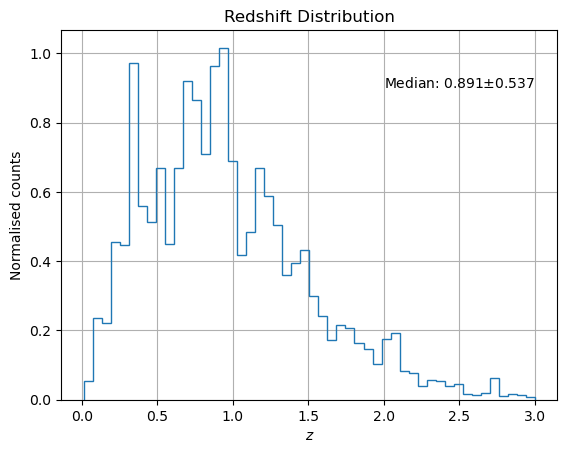

In [20]:
zDistribution = hd[1].data['ez_z_phot'][Mothercell]
plt.hist(zDistribution, histtype = 'step', density = True, bins = 50)
plt.title("Redshift Distribution")
plt.ylabel("Normalised counts")
plt.xlabel(r'$z$')
plt.grid(True)

plt.text(2,0.9, "Median: "+str(np.around(np.median(zDistribution),3))+r'$\pm$'+str(np.around(np.std(zDistribution),3)))
plt.show()

# Methods

## UVJ

### <font color='green'>Fluxes</font>

#### <font color='green'>Compiling</font>

In [21]:
# fluxes for individual bins
fU = []
fV = []
fJ = []

for Cell in Motherlist:
    fU.append(hd[1].data['ez_restU'][Cell])
    fV.append(hd[1].data['ez_restV'][Cell])
    fJ.append(hd[1].data['ez_restJ'][Cell])

In [22]:
# fluxes for 0 < z < 3
fU_all = hd[1].data['ez_restU'][Mothercell]
fV_all = hd[1].data['ez_restV'][Mothercell]
fJ_all = hd[1].data['ez_restJ'][Mothercell]

#### <font color='green'>Histogram</font>

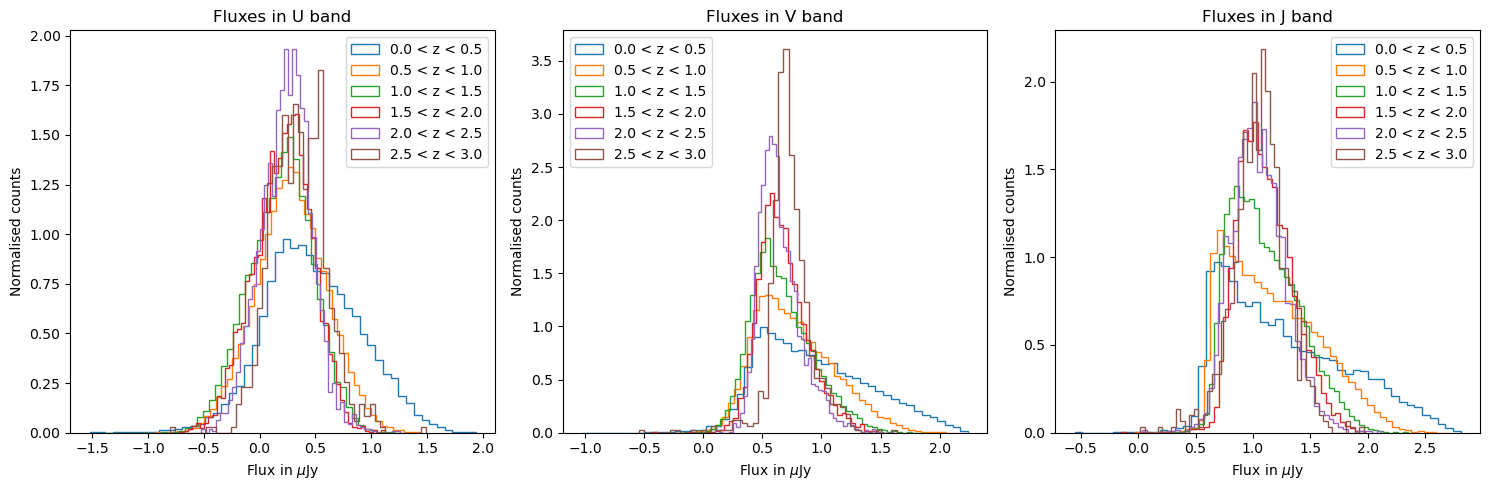

In [23]:
plt.figure(figsize = (15,5))

label = ['0.0 < z < 0.5', '0.5 < z < 1.0', '1.0 < z < 1.5', '1.5 < z < 2.0', '2.0 < z < 2.5', '2.5 < z < 3.0']
plt.subplot(1,3,1)
for i in range(6):
    plt.hist(np.log10(np.array(fU[i])), histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Fluxes in U band")
plt.ylabel("Normalised counts")
plt.xlabel(r'Flux in $\mu$Jy')
plt.legend()

plt.subplot(1,3,2)
for i in range(6):
    plt.hist(np.log10(np.array(fV[i])), histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Fluxes in V band")
plt.ylabel("Normalised counts")
plt.xlabel(r'Flux in $\mu$Jy')
plt.legend()

plt.subplot(1,3,3)
for i in range(6):
    plt.hist(np.log10(np.array(fJ[i])), histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Fluxes in J band")
plt.ylabel("Normalised counts")
plt.xlabel(r'Flux in $\mu$Jy')
plt.legend()

plt.tight_layout()
plt.show()

### <font color='green'>Magnitudes</font>

#### <font color='green'>Compiling</font>

In [24]:
# Compile magnitudes for individual redshift bins
mU = []
mV = []
mJ = []
scatter_c = []

for i in range(len(Motherlist)):
    mU.append( -2.5 * np.log10(fU[i]/3631000) )
    mV.append( -2.5 * np.log10(fV[i]/3631000) )
    mJ.append( -2.5 * np.log10(fJ[i]/3631000) )
    
    scatter_c.append(hd[1].data['lp_sSFR_med'][Motherlist[i]])

In [25]:
# Compile magnitudes for all redshift bins together
mU_all = -2.5 * np.log10(fU_all/3631000)
mV_all = -2.5 * np.log10(fV_all/3631000)
mJ_all = -2.5 * np.log10(fJ_all/3631000)
scatter_c_all = hd[1].data['lp_sSFR_med'][Mothercell]

#### <font color='green'>Histogram</font>

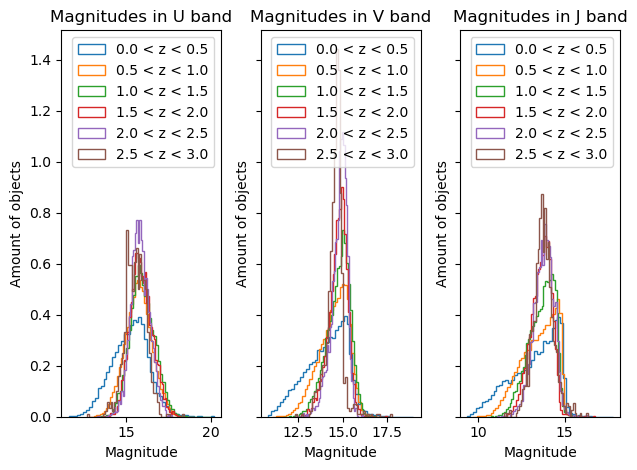

In [26]:
fig, axes = plt.subplots(1,3,sharey = True)

plt.subplot(1,3,1)
for i in range(6):
    plt.hist(mU[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in U band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.subplot(1,3,2)
for i in range(6):
    plt.hist(mV[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in V band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.subplot(1,3,3)
for i in range(6):
    plt.hist(mJ[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in J band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()

## NUV, r, J

### <font color='green'>Magnitudes</font>

#### <font color='green'>Compiling</font>

In [27]:
mNUV = []
mr = []
mJ2 = []
scatter_c2 = []

for i in range(len(Motherlist)):
    mNUV.append(hd[1].data['lp_MNUV'][Motherlist[i]])
    mr.append  (hd[1].data['lp_MR']  [Motherlist[i]])
    mJ2.append  (hd[1].data['lp_MJ']  [Motherlist[i]])
    scatter_c2.append(hd[1].data['lp_sSFR_med'][Motherlist[i]])

In [28]:
# Compile magnitudes for all redshift bins together
mNUV_all = hd[1].data['lp_MNUV'][Mothercell]
mr_all   = hd[1].data['lp_MR'][Mothercell]
mJ2_all   = hd[1].data['lp_MJ'][Mothercell] 
scatter_c_all2 = hd[1].data['lp_sSFR_med'][Mothercell]

#### <font color='green'>Histogram</font>

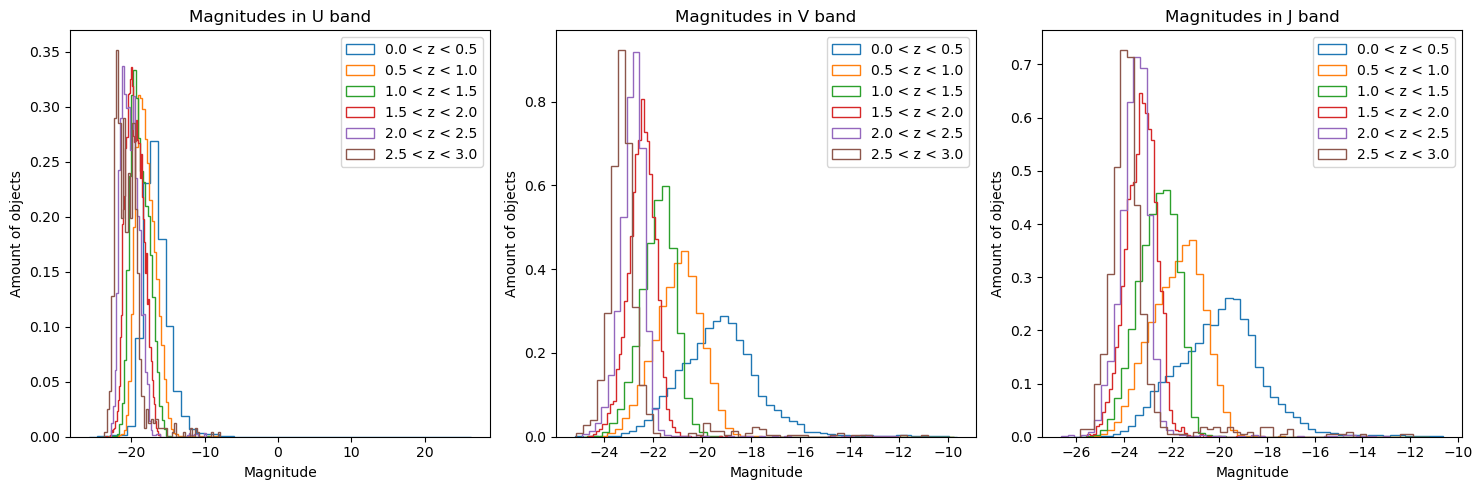

In [29]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
for i in range(6):
    plt.hist(mNUV[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in U band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.subplot(1,3,2)
for i in range(6):
    plt.hist(mr[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in V band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.subplot(1,3,3)
for i in range(6):
    plt.hist(mJ2[i], histtype = 'step', density = True, bins = 50, label = label[i])
plt.title("Magnitudes in J band")
plt.ylabel("Amount of objects")
plt.xlabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()

# Results

### <font color='green'>Magnitudes all bins</font>

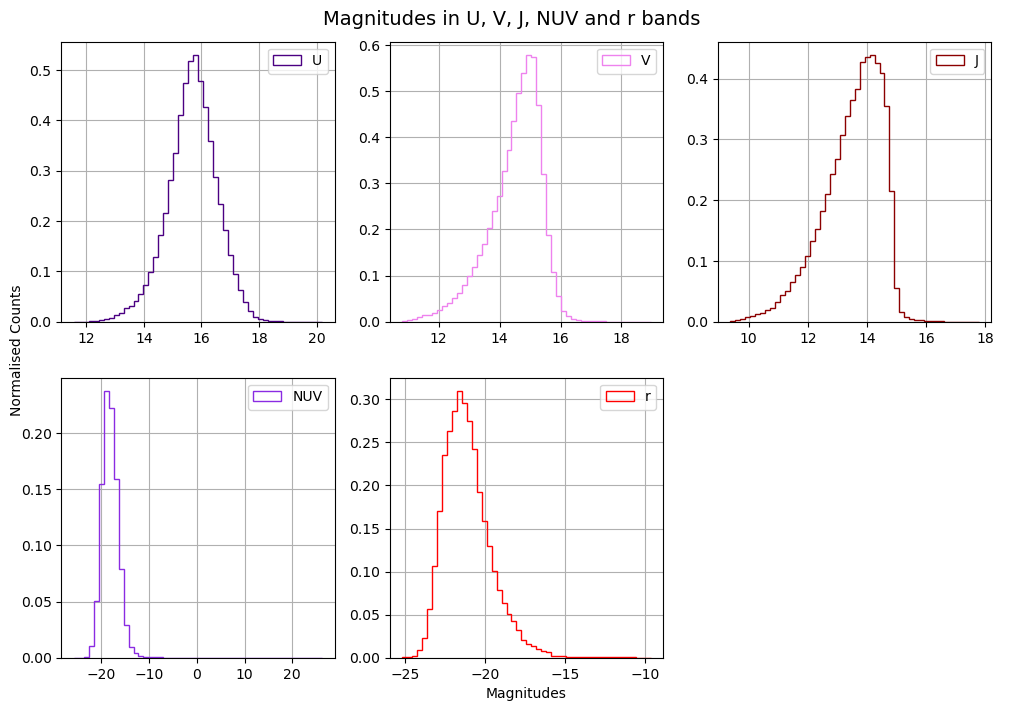

In [79]:
magsDict = {"U":mU_all, "V":mV_all, "J":mJ_all, "NUV":mNUV_all, "r":mr_all} # dictionary for iterating through data
colourList = ["indigo", "violet", "darkred", "blueviolet", "red"] # list for iterating through colours

fig, axes = plt.subplots(2,3) # setup axes
fig.set_size_inches(12,8)

idx = 1
for mag in magsDict.keys():
    plt.subplot(2,3,idx)
    plt.hist(magsDict[mag], histtype = 'step', color = colourList[idx-1], density = True, bins = 50, label = mag)
    
    # if on J band, add the other J
    #if idx == 3:
        #plt.hist(mJ2_all, histtype = 'step', color = "black", density = True, bins = 50, label = "J (LePhare")
        
    plt.legend()
    plt.grid(True)
    
    idx+=1

fig.delaxes(axes[1][2]) # remove last subplot
fig.suptitle("Magnitudes in U, V, J, NUV and r bands", fontsize=14, y= 0.92)
plt.subplots_adjust(hspace=0.2,wspace=0.2)

# big axis for shared x,y labels and title:
fig.add_subplot(111, frameon=False) # add a big axis, hide frame. this is for shared x and y labels
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False) # hide tick and tick label of the big axis
plt.xlabel("Magnitudes")
plt.ylabel("Normalised Counts")

plt.show()

### <font color='green'>UVJ Scatter + sSFR analysis (all bins)</font>

( 0 < z < 3 )
(WILLIAMS)
Star Forming Galaxies:  60596 (85.88720536334387%). Misclassified:  8919 (14.718793319691068%).
Quiescent Galaxies:  9957 (14.112794636656133%). Misclassified:  -1888 (-18.961534598774733%).

(GIOVANNI)
Star Forming Galaxies:  53279 (75.5162785423724%). Misclassified:  1602 (3.0068131909382685%).
Quiescent Galaxies:  17274 (24.483721457627595%). Misclassified:  5429 (31.428736829917796%).



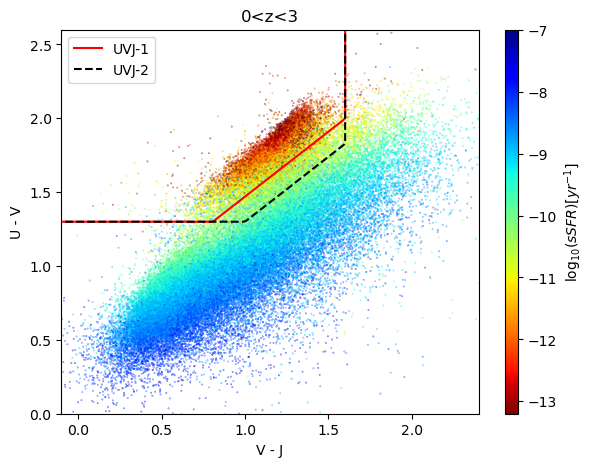

In [74]:
uvj = ssfr_analysis(1, Mothercell, mU_all, mV_all, mJ_all, 1, 0, 3, False)
uvj1 = uvj["williams"]
uvj2 = uvj["giovanni"]
scatter(1, mU_all, mV_all, mJ_all, scatter_c_all, 0, 3)

plt.show()

### <font color='green'>UVJ Scatter + sSFR analysis (each bin)</font>

( 0.0 < z < 0.5 )
(WILLIAMS)
Star Forming Galaxies:  12466 (83.86706135629709%). Misclassified:  2203 (17.672068025028075%).
Quiescent Galaxies:  2398 (16.132938643702914%). Misclassified:  -17 (-0.7089241034195163%).

(GIOVANNI)
Star Forming Galaxies:  11187 (75.26237890204521%). Misclassified:  924 (8.259587020648967%).
Quiescent Galaxies:  3677 (24.737621097954786%). Misclassified:  1262 (34.321457710089746%).

( 0.5 < z < 1.0 )
(WILLIAMS)
Star Forming Galaxies:  22418 (80.26494808449695%). Misclassified:  2927 (13.056472477473458%).
Quiescent Galaxies:  5512 (19.73505191550305%). Misclassified:  161 (2.9208998548621192%).

(GIOVANNI)
Star Forming Galaxies:  20866 (74.70819906910133%). Misclassified:  1375 (6.589667401514425%).
Quiescent Galaxies:  7064 (25.291800930898674%). Misclassified:  1713 (24.249716874292186%).

( 1.0 < z < 1.5 )
(WILLIAMS)
Star Forming Galaxies:  13464 (78.79674606425938%). Misclassified:  595 (4.41919191919192%).
Quiescent Galaxies:  3623 (21.2032539357406

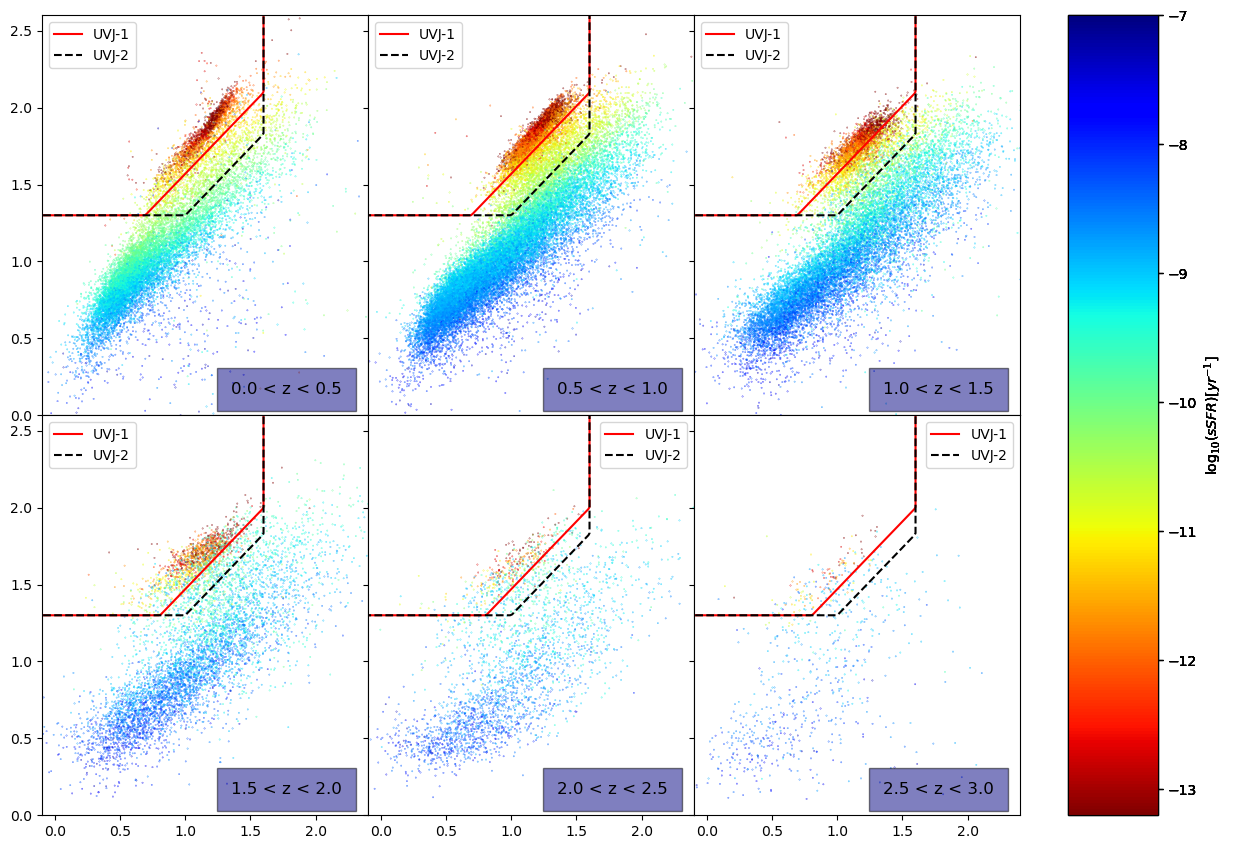

In [81]:
fig, axes = plt.subplots(2,3, sharex= True, sharey = True)
fig.set_size_inches(12, 10)
index = 0
uvj1_separate = [] # Array that stores True/False (SF/Q) values for UVJ context
uvj2_separate = [] # Array that stores True/False (SF/Q) values for UVJ context
uvj1_sf_ratio = [] # array that stores sf/q ratio for each bin (williams)
uvj2_sf_ratio = [] # array that stores sf/q ratio for each bin (giovanni)
uvj1_q_ratio = [] # array that stores q/sf ratio for each bin (williams)
uvj2_q_ratio = [] # array that stores q/sf ratio for each bin (giovanni)
for i in range(2):
    for j in range(3):
        
        # Put us in propersubplot
        plt.subplot(2,3,index+1)
        
        # Get proper zmin, zmax
        zmin = 0.5*index
        zmax = zmin + 0.5
        
        # sSFR analysis
        analysis = ssfr_analysis(1, Mothercell[index], mU[index], mV[index], mJ[index], index+1, zmin, zmax, False)
        analysis_w = analysis["williams"]
        analysis_g = analysis["giovanni"]
        uvj1_separate.append(analysis_w["true/false"])
        uvj2_separate.append(analysis_g["true/false"])
        uvj1_sf_ratio.append(analysis_w["sf ratio"])
        uvj2_sf_ratio.append(analysis_g["sf ratio"])
        uvj1_q_ratio.append(analysis_w["q ratio"])
        uvj2_q_ratio.append(analysis_g["q ratio"])
        
        # Draw scatter plot
        scatter(1, mU[index], mV[index], mJ[index], scatter_c[index], zmin, zmax)
        
        # Continue
        index += 1
        
plt.show()

### <font color='green'>NUVrJ Scatter + sSFR analysis (all bins)</font>

( 0 < z < 3 )
(ILBERT)
Star Forming Galaxies:  43477 (61.623176902470476%). Misclassified:  -8200 (-18.86054695586172%).
Quiescent Galaxies:  27076 (38.376823097529524%). Misclassified:  15231 (56.2527699807948%).



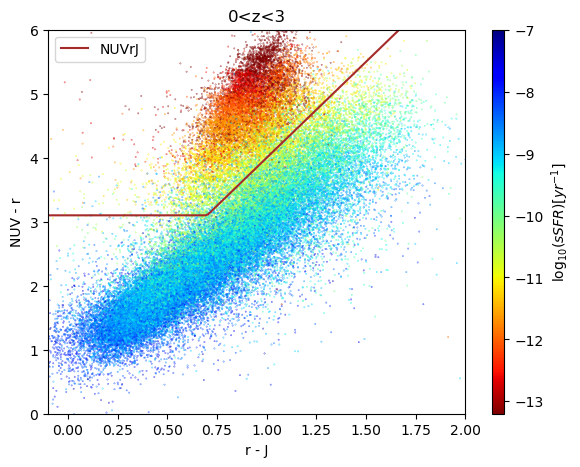

In [82]:
nuvrj = ssfr_analysis(2, Mothercell, mNUV_all, mr_all, mJ_all, 1, 0, 3, False)
scatter(2, mNUV_all, mr_all, mJ2_all, scatter_c_all, 0, 3)

plt.show()

### NUVrJ Scatter + sSFR analysis (each bin)

( 0.0 < z < 0.5 )
(ILBERT)
Star Forming Galaxies:  12245 (82.3802475780409%). Misclassified:  1982 (16.186198448346264%).
Quiescent Galaxies:  2619 (17.619752421959106%). Misclassified:  204 (7.789232531500573%).

( 0.5 < z < 1.0 )
(ILBERT)
Star Forming Galaxies:  22102 (79.13354815610455%). Misclassified:  2611 (11.81341055108135%).
Quiescent Galaxies:  5828 (20.866451843895447%). Misclassified:  477 (8.184625943719972%).

( 1.0 < z < 1.5 )
(ILBERT)
Star Forming Galaxies:  13395 (78.39293029788729%). Misclassified:  526 (3.9268383725270626%).
Quiescent Galaxies:  3692 (21.60706970211271%). Misclassified:  847 (22.941495124593718%).

( 1.5 < z < 2.0 )
(ILBERT)
Star Forming Galaxies:  5449 (79.30432251491777%). Misclassified:  -207 (-3.7988621765461557%).
Quiescent Galaxies:  1422 (20.69567748508223%). Misclassified:  500 (35.16174402250351%).

( 2.0 < z < 2.5 )
(ILBERT)
Star Forming Galaxies:  2542 (83.70102074415541%). Misclassified:  -202 (-7.946498819826909%).
Quiescent Galaxies:  4

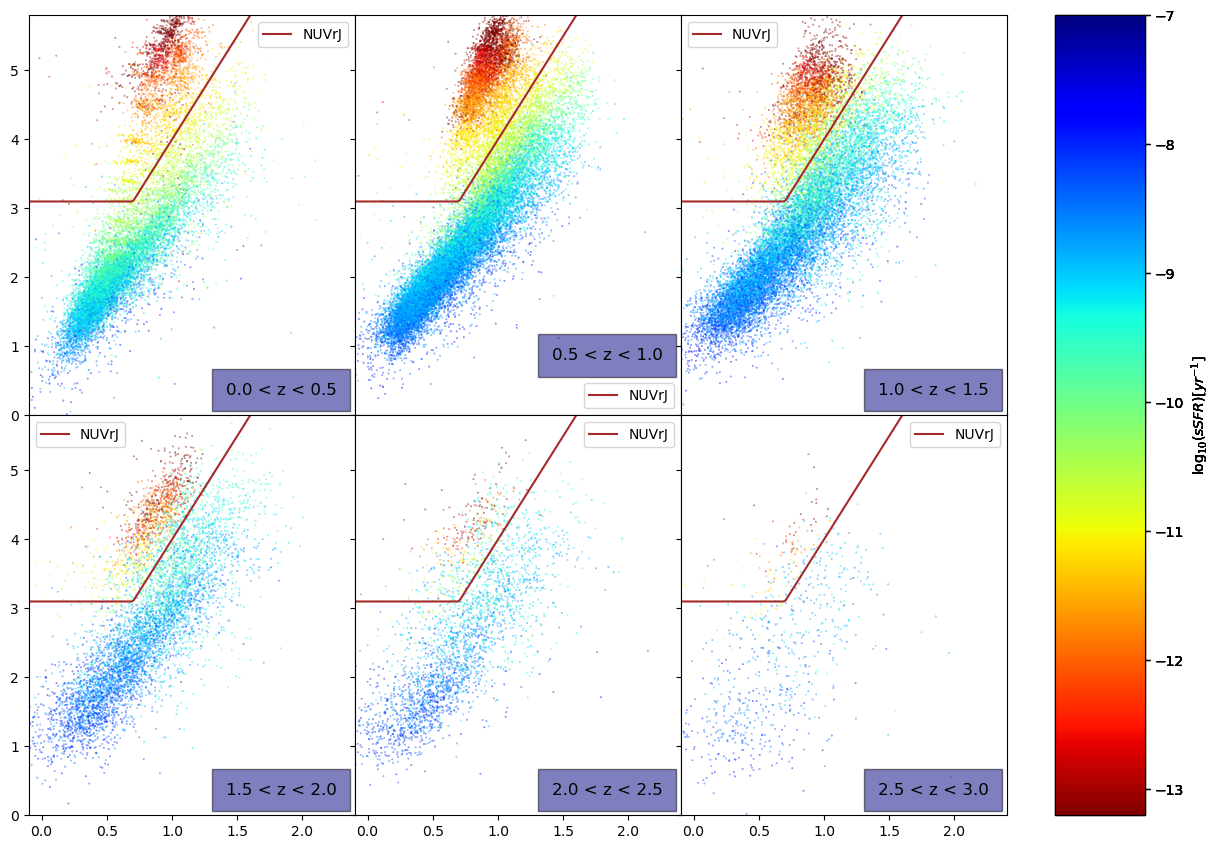

In [98]:
fig, axes = plt.subplots(2,3, sharex= True, sharey = True)
fig.set_size_inches(12, 10)
index = 0
nuvrj_separate = [] # stores True/False (SF/Q) values for all galaxies in NUVrJ context
nuvrj_sf_ratio = [] # array that stores sf/q ratio for each bin (ilbert)
nuvrj_q_ratio = [] # array that stores sf/q ratio for each bin (ilbert)
for i in range(2):
    for j in range(3):
        
        # Put us in propersubplot
        plt.subplot(2,3,index+1)
        
        # Get proper zmin, zmax
        zmin = 0.5*index
        zmax = zmin + 0.5
        
        # sSFR analysis
        analysis = ssfr_analysis(2, Mothercell[index], mNUV[index], mr[index], mJ2[index], index+1, zmin, zmax, False)
        nuvrj_separate.append(analysis["true/false"])
        nuvrj_sf_ratio.append(analysis["nuvrj sf ratio"])
        nuvrj_q_ratio.append(analysis["nuvrj q ratio"])
        
        # Draw scatter plot
        scatter(2, mNUV[index], mr[index], mJ2[index], scatter_c2[index], zmin, zmax)
        
        # Continue
        index += 1
        
plt.show()

### <font color='green'>sSFR Histogram (each bin)</font>

(0.0 < z < 0.5)
Star Forming Galaxies:  10263 (69.04601722282024%)
Green Valley Galaxies:  2185 (14.69994617868676%)
Quiescent Galaxies:  2416 (16.254036598493002%)
Median (0.0 < z < 0.5) = -9.57118

(0.5 < z < 1.0)
Star Forming Galaxies:  19491 (69.78517722878625%)
Green Valley Galaxies:  3087 (11.052631578947368%)
Quiescent Galaxies:  5352 (19.16219119226638%)
Median (0.5 < z < 1.0) = -9.12028

(1.0 < z < 1.5)
Star Forming Galaxies:  12869 (75.31456662960146%)
Green Valley Galaxies:  1363 (7.976824486451689%)
Quiescent Galaxies:  2855 (16.70860888394686%)
Median (1.0 < z < 1.5) = -9.04153

(1.5 < z < 2.0)
Star Forming Galaxies:  5656 (82.31698442730317%)
Green Valley Galaxies:  289 (4.206083539513899%)
Quiescent Galaxies:  926 (13.476932033182942%)
Median (1.5 < z < 2.0) = -8.95299

(2.0 < z < 2.5)
Star Forming Galaxies:  2744 (90.35232136977281%)
Green Valley Galaxies:  67 (2.206124464932499%)
Quiescent Galaxies:  226 (7.441554165294699%)
Median (2.0 < z < 2.5) = -8.82139

(2.5 < z 

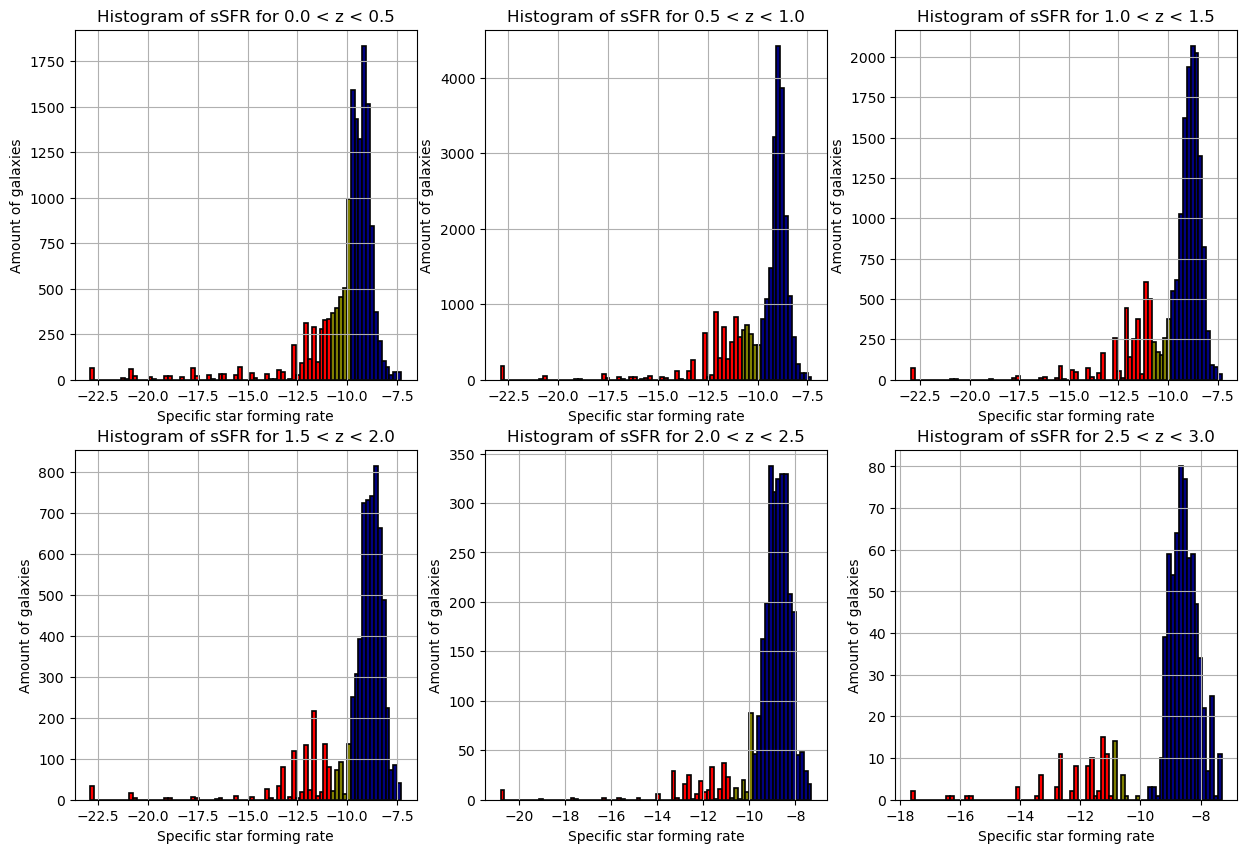

In [35]:
plt.figure(figsize = (15,10))

ssfr_sf_ratio = []
ssfr_q_ratio = []

histogram = []
total_hist = []

for i in range(1,7):
    
    # Variables
    zmin = (i-1)*0.5
    zmax = zmin + 0.5
    currentCell = Motherlist[i-1]
    
    # Get data
    x = mV[i-1] - mJ[i-1]
    y = mU[i-1] - mV[i-1]
    
    plt.subplot(2,3,i)
    ssfr_sep = ssfr_analysis(1, currentCell, mU[i-1], mV[i-1], mJ[i-1], i, zmin, zmax, True)
    data = ssfr_sep["data"]
    ssfr_sf_ratio.append(ssfr_sep["ssfr sf ratio"])
    ssfr_q_ratio.append(ssfr_sep["ssfr q ratio"])
    for item in data: total_hist.append(item)
    
    # Make Histogram
    plt.grid(True)
    N, bins, bars = plt.hist(data, edgecolor = 'black', linewidth = 1.2, bins = 80)
    for bar in bars:
        if bar.get_x() < qLine: bar.set_facecolor('red')
        elif bar.get_x() > qLine and bar.get_x() < sfLine: bar.set_facecolor('olive')
        else: bar.set_facecolor('navy')
    plt.title("Histogram of sSFR for "+str(zmin)+" < z < "+str(zmax))
    plt.xlabel('Specific star forming rate')
    plt.ylabel('Amount of galaxies')

plt.show()

### <font color='green'>sSFR Histogram (all bins)</font>

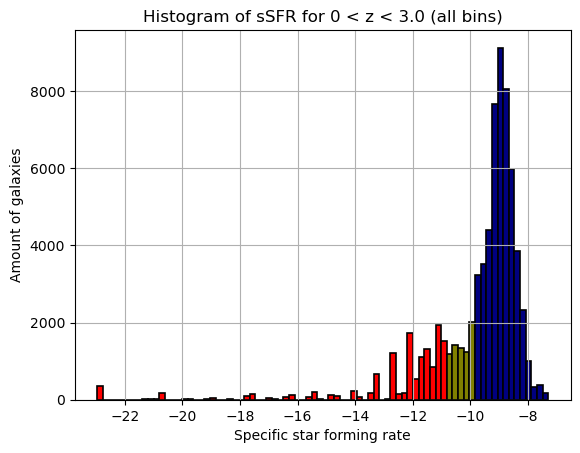

(0 < z < 3.0)
Star Forming Galaxies:  51677 (73.24564511785466%)
Green Valley Galaxies:  7014 (9.941462446671297%)
Quiescent Galaxies:  11862 (16.81289243547404%)
Median (total) = -9.14716



In [36]:
plt.grid(True)

N, bins, bars = plt.hist(total_hist, edgecolor = 'black', linewidth = 1.2, bins = 80)
for bar in bars:
    if bar.get_x() < qLine: bar.set_facecolor('red')
    elif bar.get_x() > qLine and bar.get_x() < sfLine: bar.set_facecolor('olive')
    else: bar.set_facecolor('navy')

plt.title("Histogram of sSFR for 0 < z < 3.0 (all bins)")
plt.xlabel('Specific star forming rate')
plt.ylabel('Amount of galaxies')
plt.show()

sfList = []
gvList = []
qList = []
for i in range(len(total_hist)):
    if (total_hist[i] > -10): sfList.append(total_hist[i])
    elif (total_hist[i] > -11 and total_hist[i] < -10): gvList.append(total_hist[i])
    else: qList.append(total_hist[i])
    
sf = len(sfList)
gv = len(gvList)
q = len(qList)
total = sf + q + gv
pctSF = (sf/total)*100
pctGV = (gv/total)*100
pctQ  = (q /total)*100
print("(0 < z < "+str(zmax)+")")
print('Star Forming Galaxies: ', sf, "("+str(pctSF)+"%)")
print('Green Valley Galaxies: ', gv, "("+str(pctGV)+"%)")
print('Quiescent Galaxies: ', q, "("+str(pctQ)+"%)")

totalMedian = np.nanmedian(total_hist)
print("Median (total) = "+str(totalMedian)+"\n")

# Discussion

### <font color='green'>Remove green valley</font>

In [37]:
# here we make arrays w/o gv for all criteria, so we can compare them with ssfr criterion in confusion matrices
ssfr = ssfr_analysis(1, Mothercell, [], [], [], 1, 0, 3, True)

ssfr_nogv = []
uvj1_nogv = []
uvj2_nogv = []
nuvrj_nogv = []

for i in range(len(ssfr["complete"])): # for every galaxy
    if ssfr["complete"][i] != 1: # if not in green valley according to ssfr criterion
        if ssfr["complete"][i] == 0: ssfr_nogv.append(True)
        else: ssfr_nogv.append(False)
        uvj1_nogv.append(uvj1["true/false"][i])
        uvj2_nogv.append(uvj2["true/false"][i])
        nuvrj_nogv.append(nuvrj["true/false"][i])

# # get new ratios
# ssfr_sf_nogv = 0
# ssfr_q_nogv = 0
# uvj1_sf_nogv = 0
# uvj1_q_nogv = 0
# uvj2_sf_nogv = 0
# uvj2_q_nogv = 0
# nuvrj_sf_nogv = 0
# nuvrj_q_nogv = 0
# ## star forming ratios
# for i in range(len(ssfr_nogv)):
#     if ssfr_nogv[i] == True: ssfr_sf_nogv += 1
#     if uvj1_nogv[i] == True: uvj1_sf_nogv += 1
#     if uvj2_nogv[i] == True: uvj2_sf_nogv += 1
#     if nuvrj_nogv[i] == True: nuvrj_sf_nogv += 1
# ## passive ratios
# ssfr_q_nogv = len(ssfr_nogv) - ssfr_sf_nogv
# uvj1_q_nogv = len(uvj1_nogv) - uvj1_sf_nogv
# uvj2_q_nogv = len(uvj2_nogv) - uvj2_sf_nogv
# nuvrj_q_nogv = len(nuvrj_nogv) - nuvrj_sf_nogv
    
# # normalise
# ssfr_sf_nogv /= len(ssfr_nogv)
# ssfr_q_nogv /= len(ssfr_nogv)
# uvj1_sf_nogv /= len(uvj1_nogv)
# uvj1_q_nogv /= len(uvj1_nogv)
# uvj2_sf_nogv /= len(uvj2_nogv)
# uvj2_q_nogv /= len(uvj2_nogv)
# nuvrj_sf_nogv /= len(nuvrj_nogv)
# nuvrj_q_nogv /= len(nuvrj_nogv)

(0 < z < 3)
Star Forming Galaxies:  51677 (73.24564511785466%)
Green Valley Galaxies:  7014 (9.941462446671297%)
Quiescent Galaxies:  11862 (16.81289243547404%)
Median (0 < z < 3) = -9.14716



### <font color='green'>SF/Q ratio evolution with z</font>

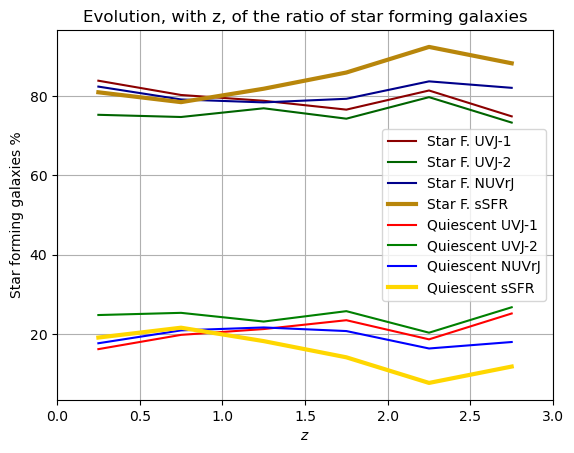

In [38]:
zBins = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75]

plt.plot(zBins, uvj1_sf_ratio ,  label="Star F. UVJ-1"  , color="darkred"      )
plt.plot(zBins, uvj2_sf_ratio ,  label="Star F. UVJ-2"  , color="darkgreen"    )
plt.plot(zBins, nuvrj_sf_ratio,  label="Star F. NUVrJ"  , color="darkblue"     )
plt.plot(zBins, ssfr_sf_ratio ,  label="Star F. sSFR"   , color="darkgoldenrod", linewidth=3) 
plt.plot(zBins, uvj1_q_ratio  ,  label="Quiescent UVJ-1", color="red"          )
plt.plot(zBins, uvj2_q_ratio  ,  label="Quiescent UVJ-2", color="green"        )
plt.plot(zBins, nuvrj_q_ratio ,  label="Quiescent NUVrJ", color="blue"         )
plt.plot(zBins, ssfr_q_ratio  ,  label="Quiescent sSFR" , color="gold"         , linewidth=3) 

plt.xlim(0,3)
plt.xlabel(r'$z$')
plt.ylabel("Star forming galaxies %")
plt.legend()
plt.grid(True)
plt.title("Evolution, with z, of the ratio of star forming galaxies")
plt.show()

## Confusion Matrix

(UVJ-1 & sSFR)
Q1: 51372 ( 80.85113080155494 %)
Q2: 2834 ( 4.460252758148538 %)
Q3: 305 ( 0.48002014510772917 %)
Q4: 9028 ( 14.208596295188784 %)


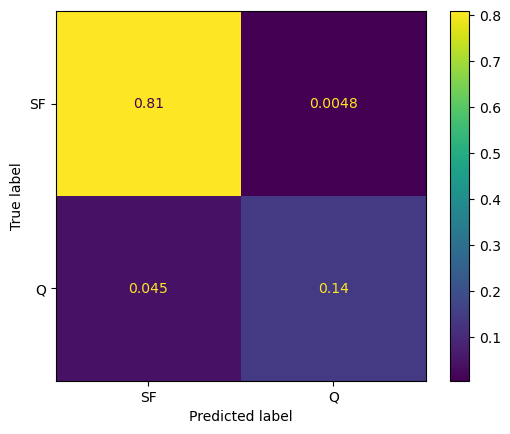

(UVJ-2 & sSFR)
Q1: 50200 ( 79.0065943751082 %)
Q2: 306 ( 0.4815939816490659 %)
Q3: 1477 ( 2.3245565715544783 %)
Q4: 11556 ( 18.187255071688256 %)


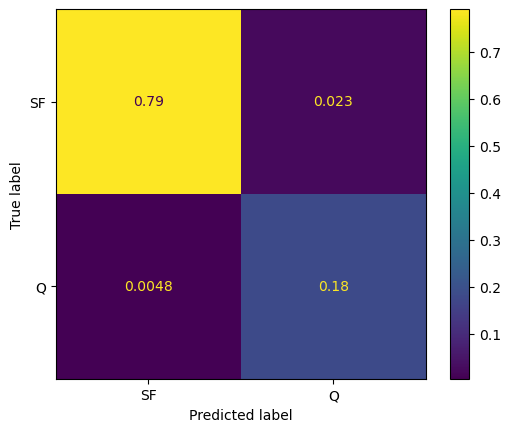

(NUVrJ & sSFR)
Q1: 42021 ( 66.13418530351439 %)
Q2: 38 ( 0.05980578857079904 %)
Q3: 9656 ( 15.196965643148303 %)
Q4: 11824 ( 18.609043264766523 %)


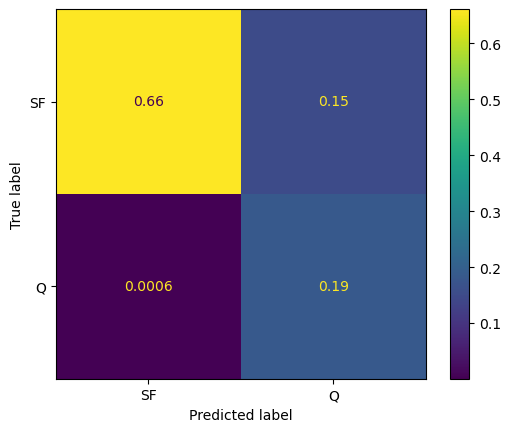

In [39]:
print("(UVJ-1 & sSFR)")
confusion_matrix(ssfr_nogv, uvj1_nogv)
print("(UVJ-2 & sSFR)")
confusion_matrix(ssfr_nogv, uvj2_nogv)
print("(NUVrJ & sSFR)")
confusion_matrix(ssfr_nogv, nuvrj_nogv)